# Introduction

*9/30/22: I'd like to deeply and thoroughly investigate a specific problem/issue impacting a marginalized group in India. I'm hoping to gain some insight into my fathers home country and find a way to use the tools I have to help someone without.*

*I've read about Kashmir a number of times now (like at least twice) and it seems like an interesting place to start.*

Information warfare is prevalent in India in the form of fake and real Twitter accounts which disseminate fake news and attack journalists and activists through false litigation. I'd like to find ways to detect bot networks which [spread propaganda widely](https://stacks.stanford.edu/file/druid:zs105tw7107/20220921%20India%20takedown.pdf), enable [FIR trolls](https://www.newslaundry.com/2021/03/01/inside-the-hindu-it-cell-the-men-who-went-online-to-protect-gods) (my own term), and are the instruments of [astroturfing](https://restofworld.org/2022/right-wing-osint-propaganda-in-india/).

# Exploring a Twitter Accounts Network

Let's take an account I know to be involved in spreading propaganda for the benefit of the Indian state in Kashmir, [Chinar Corps](https://twitter.com/ChinarcorpsIA). 

In [11]:
import tweepy

consumer_key = "PMAHNDzR08uAJyAAuOsdAfeeN"
consumer_secret = "gUC7fbLl7DYllkjMimRypGkTg5OaFjKHnKQIFsbKmqulCBkXYW"
access_token = "745655992638050304-Jkpnt9NA7AhOHQyLpqQW4Rmhd2hreXG"
access_token_secret = "oDSRCds84wDC6RRBai5NnGSPfQdkMDoQyb8D6HdFjOgTG"

auth = tweepy.OAuth1UserHandler(
   consumer_key, consumer_secret, access_token, access_token_secret
)

api = tweepy.API(auth)

In [21]:
user_list = api.search_users(q="ChinarcorpsIA")
if len(user_list) > 1:
    for user in user_list:
        print(user.name)
else:
    cc_uid = user_list[0].id_str

print(cc_uid)

849455943893090304


In [13]:
follower_list = api.get_followers(user_id=cc_uid)
for idx, follower in enumerate(follower_list):
    if idx >= 5:
        break
    print(follower.name)
    print(follower.screen_name)
    print(follower.location)
    print(follower.description)
    print("----------------------")

TooManyRequests: 429 Too Many Requests
88 - Rate limit exceeded

## Graphing the network
So we are able to look through the list of accounts following CC (via `get_followers`) and the list of accounts being followed by CC (via `get_friends`). Thinking of this as a graph we now have the edges (relationships) to join nodes (accounts) by. But I also want to add weights to the edges between nodes to represent how often those two accounts interact with one another by retweeting/liking each others content. Let's start by loading this data into a data structure that we can then represent graphically to show accounts and the relationships between them.

{1: {2: {}, 3: {'foo': 'bar'}}, 2: {}, 3: {1: {}}}


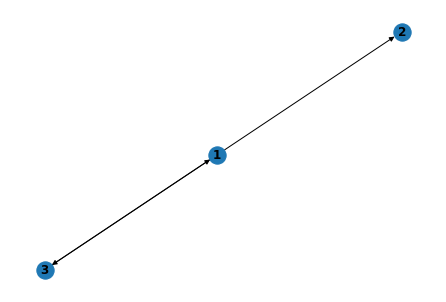

In [14]:
import networkx as nx
import matplotlib.pyplot as plt
import scipy

test_G = nx.DiGraph()
test_G.add_nodes_from([1, 2, 3])
test_G.add_edges_from([(1, 2), (1, 3), (3, 1)])
test_G.add_edge(1, 3, foo='bar')
nx.draw(test_G, with_labels=True, font_weight='bold')
print(test_G.adj)

NetworkX uses a dictionary-of-dictionary-of-dictionaries data structure to represent the graph. So the first-level dictionary has keys which are all the nodes in the graph and values which are the second-level dictionaries. The second-level dictionary has keys which are the nodes that are adjacent to the keys of the first-level dict, the values are the third-level dictionary. The third-level dictionary is just the edge attribute dictionary where the attributes are represented as keys and values (i.e. `color="red"`, `weight=0.75`). 

We can build the data structure using NetworkX itself then write the adjacency matrix to a file using `write_adjlist(graph, filename)`.

In [72]:
G = nx.DiGraph()
G.add_node("ChinarcorpsIA")

In [125]:
count = 1
follower_list, cursor_tuple = api.get_followers(user_id=cc_uid, cursor=-1, count=200)
while(len(follower_list) > 0 and count > 0):
    print(len(follower_list))
    for follower in follower_list:
        G.add_node(follower.screen_name)
        G.add_edge(follower.screen_name, "ChinarcorpsIA")
    if(len(follower_list) == 200):
        follower_list, cursor_tuple = api.get_followers(user_id=cc_uid, cursor=cursor_tuple[1], count=200)
    else:
        follower_list = []
    count -= 1

200


In [54]:
count = 1
friends_list, cursor_tuple = api.get_friends(user_id=cc_uid, cursor=-1, count=200)
while(len(friends_list) > 0 and count > 0):
    print(len(friends_list))
    for friend in friends_list:
        G.add_node(friend.screen_name)
        G.add_edge("ChinarcorpsIA", friend.screen_name)
    if(len(friends_list) == 200):
        friends_list, cursor_tuple = api.get_friends(user_id=cc_uid, cursor=cursor_tuple[1], count=200)
    else:
        friends_list = []
    count -= 1

67


68


OutEdgeDataView([('ChinarcorpsIA', 'trishakticorps'), ('ChinarcorpsIA', 'IndiaSports'), ('ChinarcorpsIA', 'IaSouthern'), ('ChinarcorpsIA', 'westerncomd_IA'), ('ChinarcorpsIA', 'suryacommand'), ('ChinarcorpsIA', 'RadioChinar'), ('ChinarcorpsIA', 'rajnathsingh'), ('ChinarcorpsIA', 'Tiny_Dhillon'), ('ChinarcorpsIA', 'DDNewslive'), ('ChinarcorpsIA', 'kheloindia'), ('ChinarcorpsIA', 'IndiainPakistan'), ('ChinarcorpsIA', 'FlagsOfHonour'), ('ChinarcorpsIA', 'prodefencejammu'), ('ChinarcorpsIA', 'JandKTourism'), ('ChinarcorpsIA', 'IndiaCoastGuard'), ('ChinarcorpsIA', 'DefProdnIndia'), ('ChinarcorpsIA', 'HQ_DG_NCC'), ('ChinarcorpsIA', 'incredibleindia'), ('ChinarcorpsIA', 'isro'), ('ChinarcorpsIA', 'KashmirPolice'), ('ChinarcorpsIA', 'Cyberdost'), ('ChinarcorpsIA', 'PMOIndia'), ('ChinarcorpsIA', 'TwitterIndia'), ('ChinarcorpsIA', 'ANI'), ('ChinarcorpsIA', 'NDRFHQ'), ('ChinarcorpsIA', 'MajDPSingh'), ('ChinarcorpsIA', 'OfficialCLAWSIN'), ('ChinarcorpsIA', 'salute2soldier'), ('ChinarcorpsIA', 'air

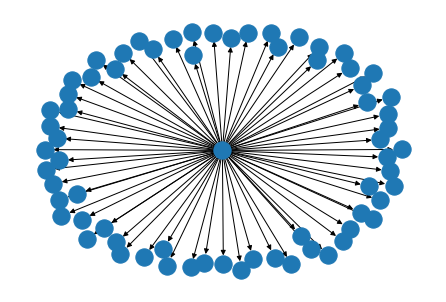

In [57]:
nx.draw(G, with_labels=False)
print(len(G.adj))

In [104]:
G = nx.read_adjlist("networks/cc_twitter_net.adjlist", create_using= nx.DiGraph())

In [119]:
import requests
# improve the graph by finding relationships between nodes:
#   for each account, check if it is following or is followed by any of the other accounts

print(list(G.nodes())[0])
print(list(G.nodes())[1])
print(len(list(G.nodes())))
print("test" in list(G.nodes()))


# nx.write_adjlist(G, "networks/cc_twitter_net_linked.adjlist")

849455943893090304
1579308776636686336
245048
True


In [96]:
follower_arr = api.get_follower_ids(user_id=cc_uid, count=5000)
print(len(follower_arr))
print(follower_arr[0])

5000
1581923617192824832


In [ ]:
friend_arr = api.get_friend_ids(user_id=cc_uid, count=5000)
print(len(friend_arr))
print(friend_arr[0])

67
1489807535968514053


In [124]:
user = api.get_user(user_id="1346439824")
print(user.screen_name)

rajnathsingh


Major facepalm, `get_*_ids` endpoints are way better because you can get 5k results with each requests instead of just 200.

## References

Github Repos:
- https://github.com/jubins/MachineLearning-Detecting-Twitter-Bots/blob/master/Project/BotsDetection.ipynb
- https://github.com/mkearney/tweetbotornot2
- https://github.com/twitterdev/Twitter-API-v2-sample-code

Papers:
- [Twibot-22](https://arxiv.org/pdf/2206.04564.pdf)
- [UNM Identifying Twitter Bots](https://www.cs.unm.edu/~chavoshi/debot/SocInfo.pdf)
- [Duo Labs White Paper](https://duo.com/assets/pdf/Duo-Labs-Dont-At-Me-Twitter-Bots.pdf)

Useful Links:
- [Botometer](https://botometer.osome.iu.edu/)
